In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
bfrom transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445989489555359, 0.11197412759065628, 0.04342695698142052]}

## classifier로 질문 분석하기

In [ ]:
classifier(
    "다음달 주요 7개국(G7) 정상회의가 열리는 일본의 도시는?",
    candidate_labels=["politics", "finance", "current affairs"],
)

{'sequence': '다음달 주요 7개국(G7) 정상회의가 열리는 일본의 도시는?',
 'labels': ['\x08current affairs', 'politics', 'finance'],
 'scores': [0.7122876644134521, 0.18766170740127563, 0.1000506579875946]}

In [ ]:
classifier(
    "Which Japanese city will the G7 summit be held next month?",
    candidate_labels=["politics", "finance", "current affairs"],
)


{'sequence': 'Which Japanese city will the G7 summit be held next month?',
 'labels': ['\x08current affairs', 'politics', 'finance'],
 'scores': [0.4682215750217438, 0.4392626881599426, 0.09251582622528076]}

In [ ]:
classifier(
    "야구에서는 ‘10루타’를, 증시에서는 투자자에게 10배 이상의 수익률을 안겨준 주식 종목을 의미하는 용어는",
    candidate_labels=["politics", "finance", "current affairs"],
)

{'sequence': '야구에서는 ‘10루타’를, 증시에서는 투자자에게 10배 이상의 수익률을 안겨준 주식 종목을 의미하는 용어는',
 'labels': ['\x08current affairs', 'finance', 'politics'],
 'scores': [0.7299197316169739, 0.16542530059814453, 0.10465496778488159]}

In [ ]:
classifier(
    "The term for stocks that gave a '10-base hit' in baseball and a return of more than 10 times to investors in the stock market is",
    candidate_labels=["politics", "finance", "current affairs"],
)


{'sequence': "The term for stocks that gave a '10-base hit' in baseball and a return of more than 10 times to investors in the stock market is",
 'labels': ['finance', '\x08current affairs', 'politics'],
 'scores': [0.5663387179374695, 0.3621135354042053, 0.07154775410890579]}

한글보다 영어로 했을 때 성능이 좋은 걸 알 수 있다. 

## 파파고 API 적용해 한 영 변환 

In [ ]:
import requests, json

In [ ]:
def translate(text, source='ko', target='en'):

    CLIENT_ID, CLIENT_SECRET= 'API_ID', 'API_PW'


    url = 'https://openapi.naver.com/v1/papago/n2mt'
    headers = {
        'Content-Type': 'application/json',
        'X-Naver-Client-Id': CLIENT_ID,
        'X-Naver-Client-Secret': CLIENT_SECRET
    }
    data = {'source': source, 'target': target, 'text': text}

    response = requests.post(url, json.dumps(data), headers=headers)
    return response.json()['message']['result']['translatedText']

In [ ]:
translate('안녕하세요.')

'Hello.'

In [ ]:
df = pd.read_csv('/content/문제은행.csv')
df.head()

,Unnamed: 0,질문,보기 답,답
0,0,1.‘달러인덱스’를 산출할 때 달러와 비교 대상으로 포함되지 않는 화폐는?,① 유로 ② 엔 ③ 파운드 ④ 위안,1④
1,1,안정된 직장에 소속되기보다 프리랜서로 자유롭게 일하는 근로자가 많아지는 경제 현상은?,① 긱 이코노미② 미스매치③ 낙수효과④ 롱테일 법칙,2①
2,2,다음달 주요 7개국(G7) 정상회의가 열리는 일본의 도시는?,① 도쿄 ② 히로시마③ 나고야 ④ 교토,3②
3,3,다음 중 우리나라 증시에서 시가총액이 가장 큰 상장사는 어디일까?,① 삼성전자② SK하이닉스③ LG에너지솔루션④ 현대자동차,4①
4,4,국내외 금융 중심가에서는 ‘이것’의 동상을 많이 볼 수 있다?,① 황소 ② 곰③ 비둘기 ④ 매,5①


In [ ]:
translated_questions = []

for question in df['질문']:
    translated_questions.append(translate(question))

In [ ]:
translated_questions[0]

"1. Which currency is not included in comparison with the dollar when calculating the 'dollar index'?"

In [ ]:
translated_questions[0]

"1. Which currency is not included in comparison with the dollar when calculating the 'dollar index'?"

In [ ]:
temp = classifier(
        translated_questions[0],
        candidate_labels=["basic definition",
                        "investment",
                        "current affairs", 
                        'finance history', 
                        'regulation'],
    )

In [ ]:
temp = pd.DataFrame(temp)
temp

,sequence,labels,scores
0,1. Which currency is not included in compariso...,basic definition,0.596889
1,1. Which currency is not included in compariso...,current affairs,0.250428
2,1. Which currency is not included in compariso...,finance history,0.076714
3,1. Which currency is not included in compariso...,investment,0.046872
4,1. Which currency is not included in compariso...,regulation,0.029098


In [ ]:
temp = temp.sort_values('scores', ascending=False)
temp

,sequence,labels,scores
0,1. Which currency is not included in compariso...,basic definition,0.596889
1,1. Which currency is not included in compariso...,current affairs,0.250428
2,1. Which currency is not included in compariso...,finance history,0.076714
3,1. Which currency is not included in compariso...,investment,0.046872
4,1. Which currency is not included in compariso...,regulation,0.029098


In [ ]:
temp.loc[0,'labels']

'\x08basic definition'

In [ ]:
유형 = []
for question in translated_questions:
    temp = classifier(
            question,
            candidate_labels=["basic definition",
                            "investment",
                            "current affairs", 
                            'finance history', 
                            'regulation'],
            )
    temp = pd.DataFrame(temp)
    temp = temp.sort_values('scores', ascending=False)
    label = temp.loc[0,'labels']
    유형.append(label)


    

In [ ]:
유형

['\x08basic definition',
 '\x08basic definition',
 '\x08current affairs',
 '\x08current affairs',
 '\x08basic definition',
 'investment',
 'investment',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08current affairs',
 '\x08current affairs',
 'investment',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08current affairs',
 'investment',
 '\x08current affairs',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 'investment',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08current affairs',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition',
 '\x08basic definition']

In [ ]:
import seaborn as sns 

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8 () missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


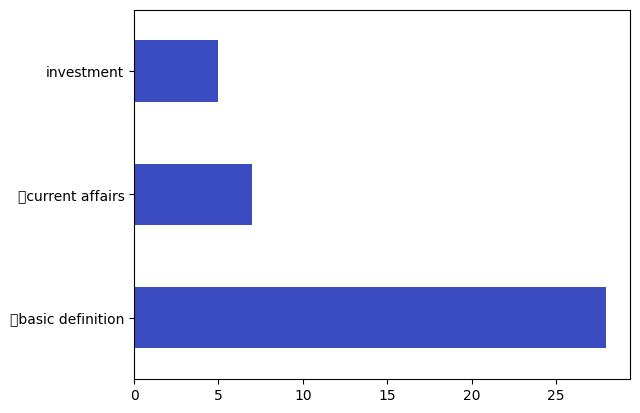

In [ ]:
pd.Series(유형).value_counts().plot.barh(cmap='coolwarm')